In [465]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [523]:
folder = "build2/bin/"
#folder = "build4/bin/lin_1/"

In [ ]:
NData = 512

class run():
    def __init__(self,folder,strIter = '0'):
        self.data_actual = np.fromfile(folder+'data_actual.dat', dtype='f8').reshape([NData, NData])
        self.data_ps = np.loadtxt(folder+'/data_ps.txt', dtype = 'f8')
        self.k_bins = np.loadtxt('%sk_bins.txt' % folder)
        self.actual_ps = np.loadtxt('%sactual_ps.txt' % folder)
        self.delta_x = np.fromfile('%sdeltax2.dat' % folder, dtype='f8')
        try:
            self.gamma1 = np.fromfile('%sdata_gamma1.dat' % folder, dtype='f8')
            self.gamma2 = np.fromfile('%sdata_gamma2.dat' % folder, dtype='f8')
        self.delta_ps = np.loadtxt('%sdelta_ps.txt' % folder)
        self.fiducial_ps = np.loadtxt('%sfiducial_ps.txt' % folder)
        self.sigma_noise = np.fromfile('%ssigmax2.dat' % folder, dtype='f8')
        self.mask = np.fromfile('%smask2.dat' % folder, dtype='f8')
        self.datax2 = np.fromfile('%sdatax2.dat' % folder, dtype='f8')
        self.delta_x_min = np.fromfile('%sdeltax2min.dat' % folder, dtype='f8')
        try:
            self.wfx = np.fromfile('%swfx2.dat' % folder, dtype='f8')
            self.wf_ps = np.loadtxt('%swf_ps.txt' % folder)

        except:
            print("No WF Data!")
        self.delta_min_ps = np.loadtxt('%sdelta_min_ps.txt' % folder)
        self.theta_est = np.loadtxt('%stheta_est_%s.txt' % (folder, strIter))
        self.theta_error = np.loadtxt('%stheta_error_%s.txt' % (folder, strIter))
        self.chi2 = np.loadtxt('%schi2.txt' % folder)
        self.bl = np.loadtxt('%sbl.txt' % folder)
        self.bEst = np.loadtxt('%sb_est_%d.txt' % (folder, c))
        
        

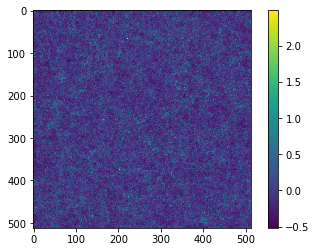

In [514]:
NData = 512
data_actual = np.fromfile(folder+'data_actual.dat', dtype='f8').reshape([NData, NData])
imshow(data_actual)
colorbar()

[]

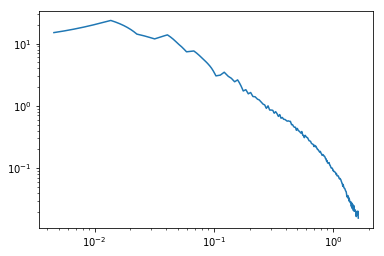

In [515]:
data_ps = np.loadtxt(folder+'/data_ps.txt', dtype = 'f8')
plt.plot(data_ps[:,0], data_ps[:,1])
plt.loglog()

In [516]:
#folder = 'build/test_64_new/'
k_bins = np.loadtxt('%sk_bins.txt' % folder)

In [517]:
k_bins

array([ 0.00447928,  0.0134378 ,  0.0223964 ,  0.0313549 ,  0.0403135 ,
        0.049272  ,  0.0582306 ,  0.0671892 ,  0.0761477 ,  0.0851063 ,
        0.0940648 ,  0.103023  ,  0.111982  ,  0.12094   ,  0.129899  ,
        0.138858  ,  0.147816  ,  0.156775  ,  0.165733  ,  0.174692  ,
        0.18365   ,  0.192609  ,  0.201567  ])

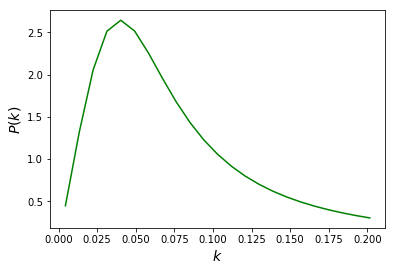

In [518]:
actual_ps = np.loadtxt('%sactual_ps.txt' % folder)
plt.plot(k_bins, actual_ps, 'g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize = 14)
#plt.loglog()
plt.savefig('pk_64.eps')

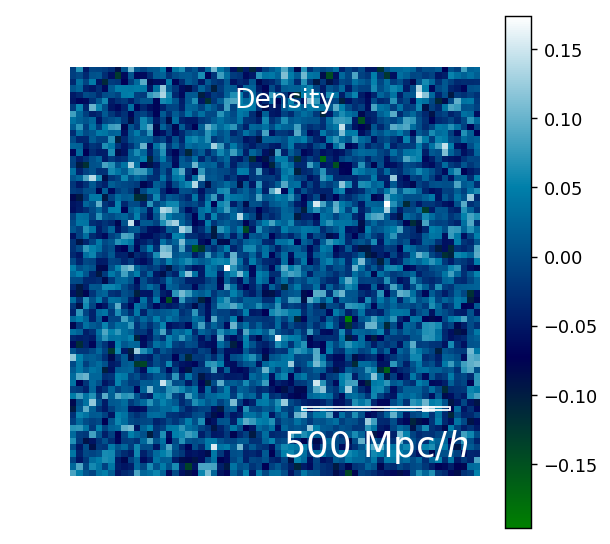

In [519]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

def plot_image(matrix, cmap = cm.ocean, sizebar = True, text = '', colorbar = True, useAx = None, text_start_pos = 0.4):
    N = int(np.sqrt(len(matrix)))
    matrix = matrix.reshape([N, N])

    fig = figure(figsize=(4,4), dpi=128)
    if useAx == None:
        ax = fig.add_axes([0,0,1,1])
    else:
        ax = useAx
        ax.cla()
    
    ax.set_axis_off()
    im = ax.imshow(matrix, cmap=cmap, extent=(0,1380,0,1380))

    if colorbar:
        fig.colorbar(im)
        
    asb =  AnchoredSizeBar(ax.transData,
                             500,
                             '500 Mpc/$h$',
                             loc=4,
                             pad=0.1, borderpad=0.5, sep=10,
                             frameon=False, color = 'white', size_vertical = 10)

    fontsize = 20
    color = 'white'
    if color is not None:
        for r in asb.size_bar.findobj(Rectangle):
            r.set_edgecolor(color)
        for t in asb.txt_label.findobj(Text):
            t.set_color(color)
    if fontsize is not None:
        for t in asb.txt_label.findobj(Text):
            t.set_fontsize(fontsize)

    if sizebar:
        ax.add_artist(asb)
        
    if text != '':
        ax.text(text_start_pos, 0.9, text, color = 'white', fontsize = 15, transform = ax.transAxes)
  
    return ax, im


delta_x = np.fromfile('%sdeltax2.dat' % folder, dtype='f8')
plot_image(delta_x, text = 'Density')
#colorbar()
savefig('data_clean.png', dpi = 128)

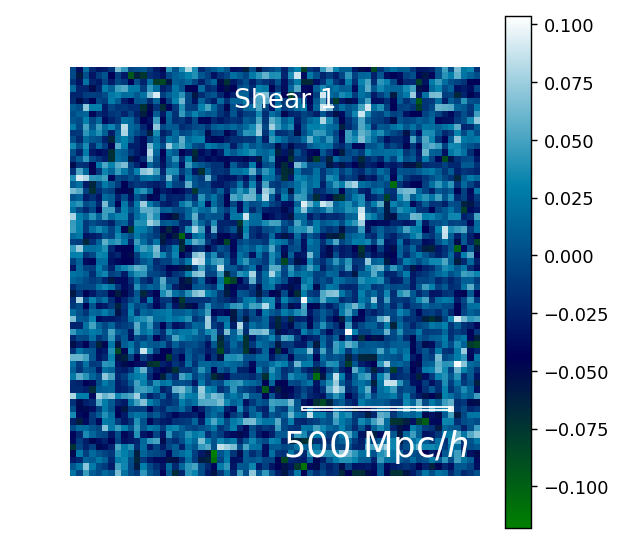

In [520]:
gamma1 = np.fromfile('%sdata_gamma1.dat' % folder, dtype='f8')
plot_image(gamma1, text = "Shear 1")
#colorbar()
savefig('gamma1_clean.png')

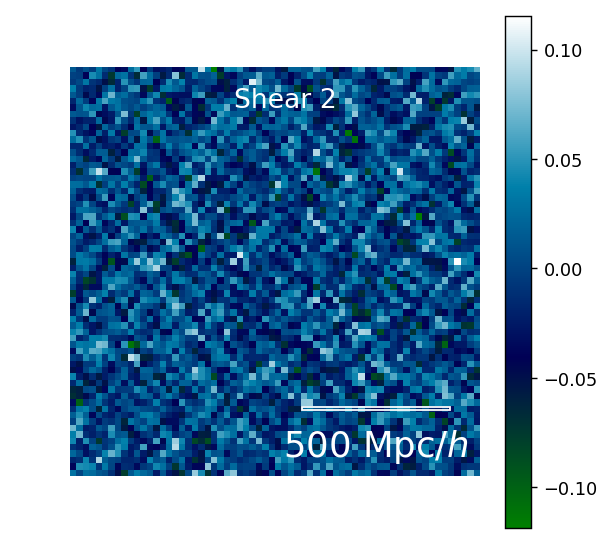

In [521]:
gamma2 = np.fromfile('%sdata_gamma2.dat' % folder, dtype='f8')
plot_image(gamma2, text = "Shear 2")
#colorbar()
savefig('gamma2_clean.png')

[]

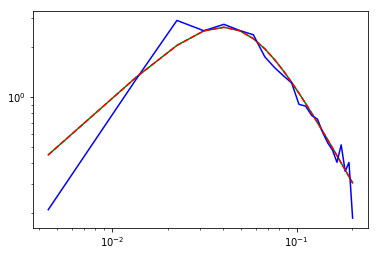

In [522]:
delta_ps = np.loadtxt('%sdelta_ps.txt' % folder)
fiducial_ps = np.loadtxt('%sfiducial_ps.txt' % folder)
plt.plot(k_bins, actual_ps, 'g')
plt.plot(k_bins, delta_ps, 'b')
plt.plot(k_bins, fiducial_ps, 'r--')
plt.loglog()

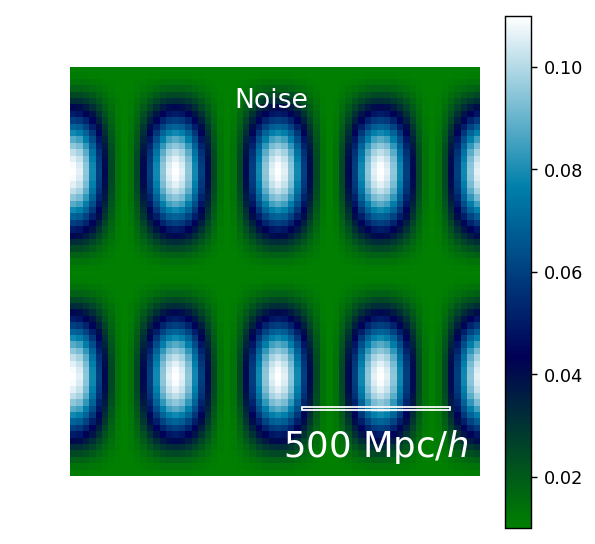

In [496]:
sigma_noise = np.fromfile('%ssigmax2.dat' % folder, dtype='f8')
ax = plot_image(sigma_noise, text = "Noise")
savefig('sigma_noise.png')

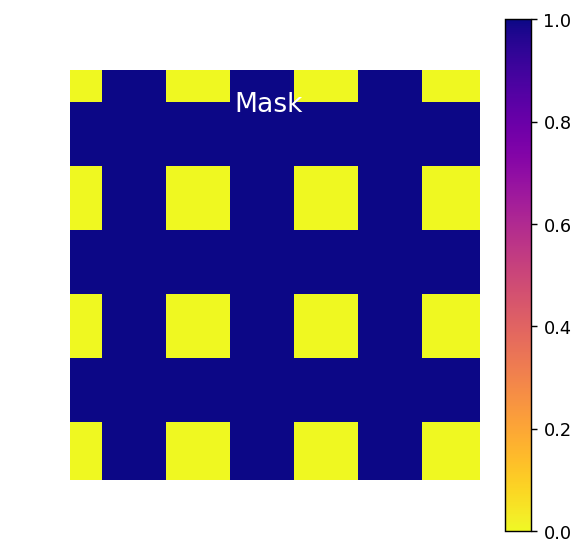

In [524]:
mask = np.fromfile('%smask2.dat' % folder, dtype='f8')
plot_image(mask, cmap = cm.plasma_r, sizebar = False, text = "Mask")
savefig('mask.png')

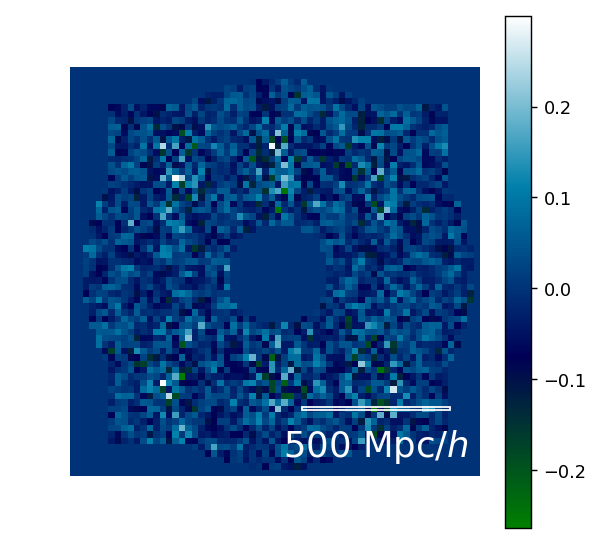

In [498]:
datax2 = np.fromfile('%sdatax2.dat' % folder, dtype='f8')
plot_image(datax2*mask)
savefig('data_noisy_masked.png')

delta_x_higher = np.fromfile('%sdeltax2_higher.dat' % folder, dtype='f8').reshape([N, N])
imshow(delta_x_higher)
colorbar()

In [499]:
gamma1_noisy = np.fromfile('%sdata_gamma1_noisy.dat' % folder, dtype='f8')
plot_image(gamma1_noisy * mask, text = "Shear 1 Observed", text_start_pos = 0.3)
savefig('gamma1_noisy_masked.png')

IOError: [Errno 2] No such file or directory: 'build4/bin/lin_l/data_gamma1_noisy.dat'

In [500]:
gamma2_noisy = np.fromfile('%sdata_gamma2_noisy.dat' % folder, dtype='f8')
plot_image(gamma2_noisy * mask, text = "Shear 2 Observed", text_start_pos = 0.3)
savefig('gamma2_noisy_masked.png')

IOError: [Errno 2] No such file or directory: 'build4/bin/lin_l/data_gamma2_noisy.dat'

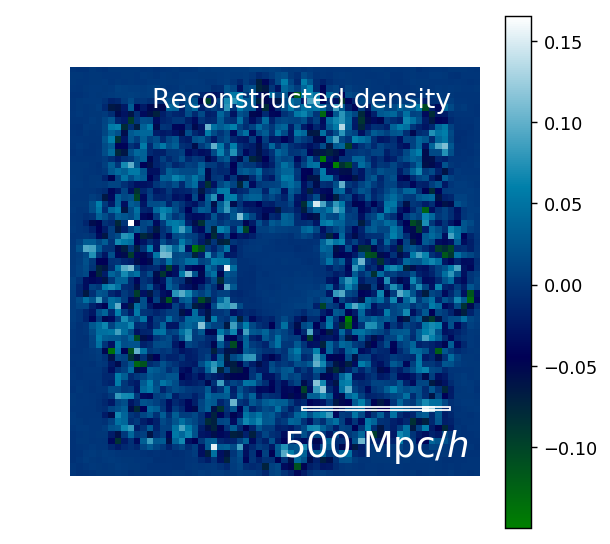

In [501]:
delta_x_min = np.fromfile('%sdeltax2min.dat' % folder, dtype='f8')
plot_image(delta_x_min, text = 'Reconstructed density', text_start_pos = 0.2)
savefig('lbfgs_solution.png')

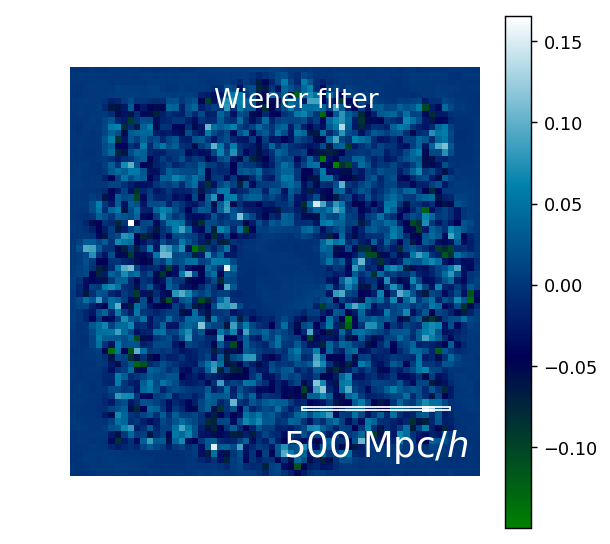

In [502]:
wfx = np.fromfile('%swfx2.dat' % folder, dtype='f8')
plot_image(wfx, text = "Wiener filter", text_start_pos = 0.35)
savefig('wiener_filter_solution.png')

(<matplotlib.axes._axes.Axes at 0x7f5ba487ad10>,
 <matplotlib.image.AxesImage at 0x7f5b9fc7ead0>)

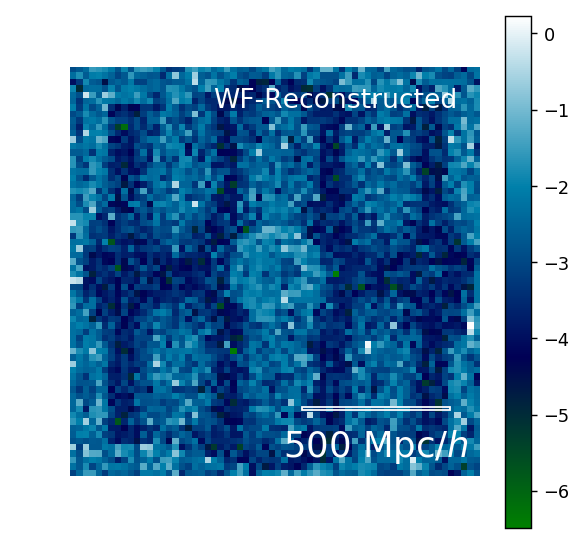

In [503]:
plot_image(log10(abs((wfx-delta_x_min)/delta_x)), text = "WF-Reconstructed", text_start_pos = 0.35)


In [504]:
def compare(actual, expected):
    absdiff = np.abs(actual - expected)
    abs_expected = np.abs(expected)
    abs_expected[abs_expected < 1e-10] = 1.
    ratio = absdiff / abs_expected
    return ratio.max()

In [505]:
N = int(np.sqrt(len(delta_x_min)))
compare(np.fft.rfft2(delta_x_min.reshape((N, N))), np.fft.rfft2(wfx.reshape((N, N))))

0.71053564009082382

In [506]:
print np.fft.rfft2(delta_x_min.reshape((N, N)))[0,0]
print np.fft.rfft2(wfx.reshape((N, N)))[0,0]

(-0.285962853839+0j)
(-0.288699850761+0j)


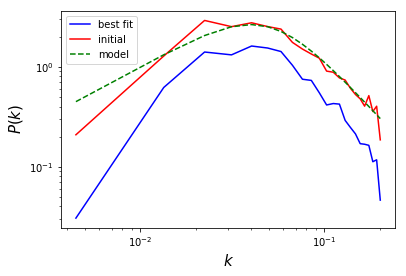

In [507]:
delta_min_ps = np.loadtxt('%sdelta_min_ps.txt' % folder)
plt.plot(k_bins, delta_min_ps, 'b', label = 'best fit')
plt.plot(k_bins, delta_ps, 'r', label = 'initial')
plt.plot(k_bins, actual_ps, 'g--', label = 'model')
plt.loglog()
plt.legend()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_min.png')

[]

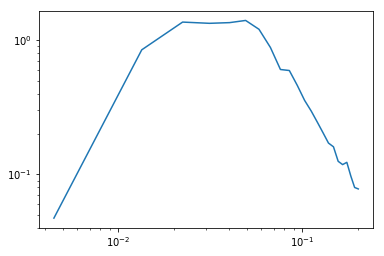

In [372]:
wf_ps = np.loadtxt('%swf_ps.txt' % folder)
plt.plot(k_bins, wf_ps)
plt.loglog()

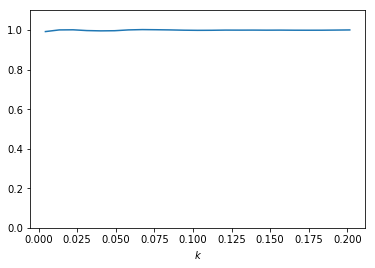

In [373]:
plt.plot(k_bins, delta_min_ps / wf_ps)
plt.axis([None, None, 0, 1.1])
plt.xlabel('$k$')
plt.savefig('transfer_lbfgs_wf.png')

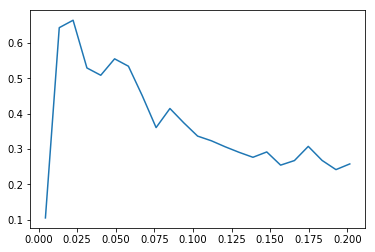

In [374]:
plt.plot(k_bins, delta_min_ps / actual_ps)
#plt.axis([None, None, 0, 1.5])

In [375]:
q = np.loadtxt('%sq.txt' % folder).reshape([N / 4, N / 4])
imshow(q)
colorbar()

IOError: [Errno 2] No such file or directory: 'build4/bin/lin_l/q.txt'

In [376]:
imshow(data_x[:N/4,:N/4])
colorbar()

NameError: name 'data_x' is not defined

In [377]:
imshow(q / data_x[:N/4,:N/4])
colorbar()
print q / data_x[:N/4,:N/4]

NameError: name 'q' is not defined

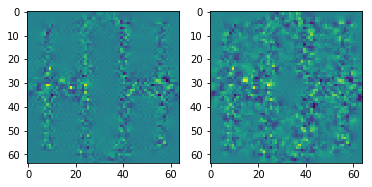

In [378]:
def plotIteration(i, fileName):
    plt.subplot(1, 2, 1)
    delta_x_0 = np.fromfile('%slbfgs_lin_iter_%d.dat' % (folder, i), dtype='f8').reshape([N, N])
    imshow(delta_x_0)
    plt.subplot(1, 2, 2)
    imshow(delta_x_min.reshape([N, N]))
    plt.savefig(fileName)
    
plotIteration(0, 'lbfgs_iter_0.png')
plotIteration(1, 'lbfgs_iter_1.png')

12
15  iterations


ValueError: Cannot save animation: no writers are available. Please install ffmpeg to save animations.

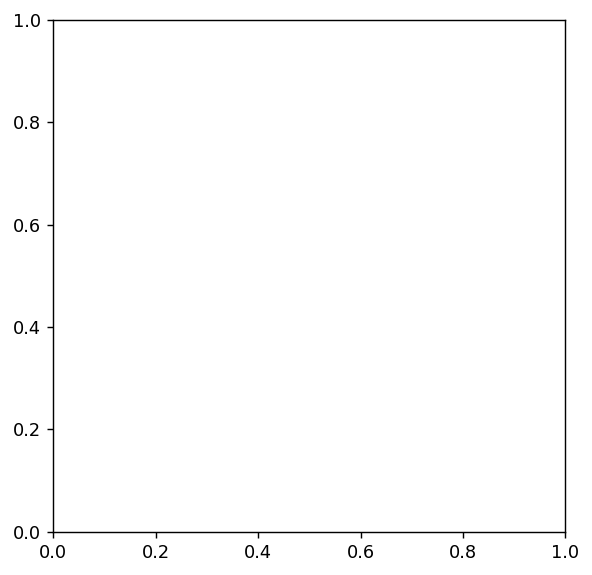

In [379]:
from matplotlib import animation
import os.path

def createAnimation():
    fig = figure(figsize=(4,4), dpi=128)
    ax = fig.add_axes([0,0,1,1])
    
    it = 0
    while True:
        filename = '%slbfgs_lin_iter_%d.dat' % (folder, it)
        if os.path.exists(filename):
            it += 1
        else:
            break
            
    chi2 = np.loadtxt('%schi2.txt' % folder)
    print len(chi2)
            
    print it, ' iterations'
    
    def animate(i):
        filename = '%slbfgs_lin_iter_%d.dat' % (folder, i)
        text = 'Iteration: %d, $\chi^2 = %.2f$' % (i, chi2[i,1])
        mat = np.fromfile(filename, dtype='f8')
        ax1, im  = plot_image(mat, useAx = ax, text = text, text_start_pos = 0.2)
        return im
    
    def init():
        return animate(0)
    
    anim = animation.FuncAnimation(fig, animate, init_func = init, frames = it, interval = 10)
    return anim

anim = createAnimation()
anim.save('lbfgs_iterations.mp4', fps = 5)

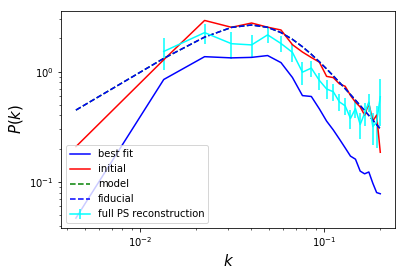

In [380]:
strIter = '0'
theta_est = np.loadtxt('%stheta_est_%s.txt' % (folder, strIter))
theta_error = np.loadtxt('%stheta_error_%s.txt' % (folder, strIter))
plt.errorbar(k_bins, theta_est, yerr = theta_error, label = 'full PS reconstruction', color = 'cyan')
plt.plot(k_bins, delta_min_ps, 'b', label = 'best fit')
plt.plot(k_bins, delta_ps, 'r', label = 'initial')
plt.plot(k_bins, actual_ps, 'g--', label = 'model')
plt.plot(k_bins, fiducial_ps, 'b--', label = 'fiducial')
plt.legend(loc = 3)
plt.loglog()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_reconstructed.png')


## plot $\chi^2$ as a function of iterations

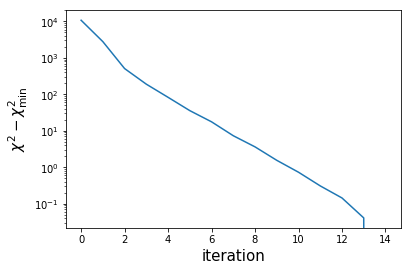

In [313]:
chi2 = np.loadtxt('%schi2.txt' % folder)
plt.plot(chi2[:,0], chi2[:,1] - chi2[-1,1])
plt.yscale('log')
plt.xlabel('iteration', fontsize=15)
plt.ylabel('$\chi^2-\chi_\min^2$', fontsize=15)
plt.savefig('chi2.png')

In [314]:
c = 0
strIter = str(c)

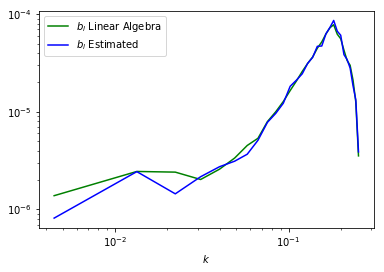

In [315]:
bl = np.loadtxt('%sbl.txt' % folder)
plot(k_bins, bl, 'g', label='$b_l$ Linear Algebra')
bEst = np.loadtxt('%sb_est_%d.txt' % (folder, c))
plot(k_bins, bEst, 'b', label = '$b_l$ Estimated')
plt.xlabel('$k$')
plt.legend(loc=2)
plt.loglog()
plt.savefig('noise_bias.png')

[ 0.5892477   0.9961606   0.59945227  1.06720938  1.05957789  0.92864055
  0.8134835   0.95487888  0.98294309  0.96267751  0.96032518  1.10560656
  1.01935103  0.94628375  1.00181677  0.99117384  1.04442961  0.90807205
  1.00278689  1.00604924  1.10703742  1.07323587  1.08650789  0.90066553
  1.02104472  0.93794687  0.87670117  1.05405663  1.09915043]


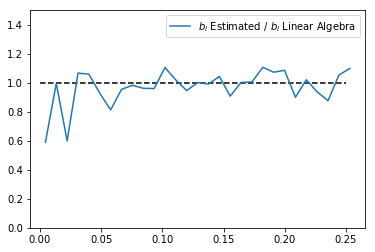

In [316]:
plot(k_bins, bEst / bl, label = '$b_l$ Estimated / $b_l$ Linear Algebra')
plt.axis([None, None, 0, 1.5])
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.legend(loc = 1)
plt.savefig('noise_bias_ratio.png')
print bEst / bl

In [432]:
import os.path

it = 0
b_ratio = []
while True:
    b_est_filename = '%sb_est_%d.txt' % (folder, it)
    if os.path.exists(b_est_filename):
        b_est_current = np.loadtxt(b_est_filename)
        b_ratio_current = b_est_current / bl
        b_ratio.append(np.average(np.abs(b_ratio_current - 1.)))
        it += 1
    else:
        break
        
#b_ratio1 = b_ratio
#plt.plot(b_ratio1, 'b', label = 'old')
plt.plot(b_ratio, 'g', label = 'new')
#plt.yscale('log')
plt.legend()
#plt.xscale('log')
plt.title('power normalization per bin')
plt.savefig('noise_convergence_bin.png')

ValueError: operands could not be broadcast together with shapes (23,) (29,) 

[]

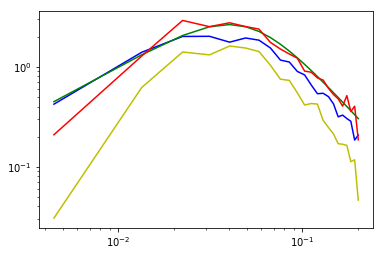

In [433]:
gibbs_ps = np.loadtxt('%sgibbs_ps_avg_0.txt' % folder)
plt.plot(k_bins, gibbs_ps, 'b')
plt.plot(k_bins, actual_ps, 'g')
plt.plot(k_bins, delta_ps, 'r')
plt.plot(k_bins, delta_min_ps, 'y')
plt.loglog()

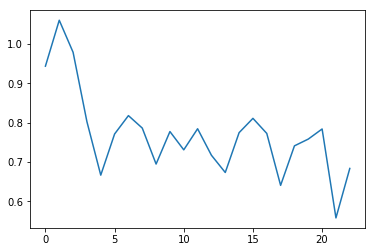

In [434]:
plt.plot(gibbs_ps / actual_ps)

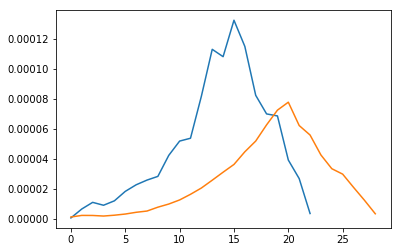

In [435]:
signal = np.loadtxt('%ssignal.txt' % folder)
plot(signal)
plot(bl)

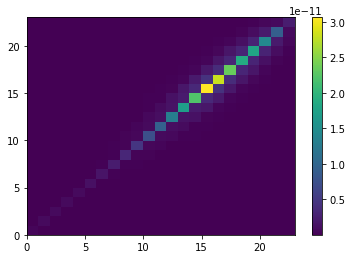

In [436]:
fisher = np.loadtxt('%sfisher.txt' % folder)
pcolor(fisher)
colorbar()
plt.savefig('fisher_linear.png')

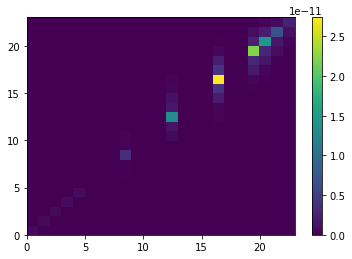

In [437]:
c = 0
fisher_est = np.loadtxt('%sfisher_est_%d.txt' % (folder, c))
#fisher_est1 = fisher_est
pcolor(fisher_est)
colorbar()
plt.savefig('fisher_estimated.png')

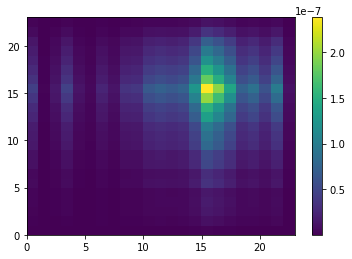

In [438]:
c = 0
fisher_new_est = np.loadtxt('%sfisher_new_est_%d.txt' % (folder, c))
pcolor(fisher_new_est)
colorbar()
plt.savefig('fisher_new_estimated.png')

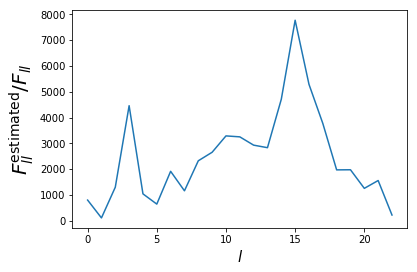

In [439]:
plot(np.diag(fisher_new_est) / np.diag(fisher))
xlabel('$l$', fontsize = 15)
ylabel('$F^\mathrm{estimated}_{ll}/F_{ll}$', fontsize = 20)
savefig('fisher_diag_ratio.png')

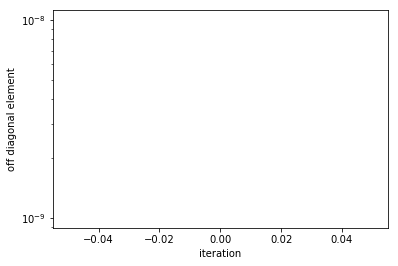

In [440]:
max_iter = c + 1
off_diag = []
for i in range(0,max_iter,100):
    f = np.loadtxt('%sfisher_new_est_%d.txt' % (folder, i))
    off_diag.append([i,f[7, 8]])
    
off_diag = np.array(off_diag)
    
plot(off_diag[:,0], off_diag[:,1])
yscale('log')
xlabel('iteration')
ylabel('off diagonal element')
savefig('off_diag_convergence.png')

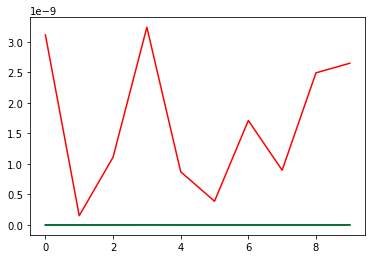

In [441]:
plot(fisher[3,:10], 'b')
plot(fisher_est[3,:10], 'g')
plot(fisher_new_est[3,:10], 'r')

In [442]:
plot(np.diag(fisher_est - fisher_est1) / np.diag(fisher_est1))

NameError: name 'fisher_est1' is not defined

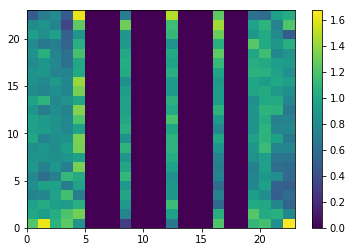

In [443]:
fisher_ratio = fisher_est / fisher
pcolor(fisher_ratio)
colorbar()
plt.savefig('fisher_ratio.png')

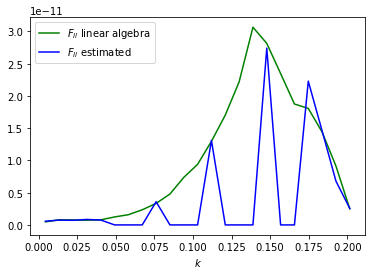

In [444]:
plot(k_bins, np.diag(fisher), 'g', label= "$F_{ll}$ linear algebra")
plot(k_bins, np.diag(fisher_est), 'b', label = "$F_{ll}$ estimated")
plt.xlabel('$k$')
plt.legend(loc=2)
plt.savefig('fisher_diagonal.png')

[ 1.22698545  0.9278891   0.93174164  1.16751872  0.96473204  0.          0.
  0.          1.0789975   0.          0.          0.          1.01072889
  0.          0.          0.          0.97389092  0.          0.
  1.23377357  1.01227254  0.74393998  1.03168981]


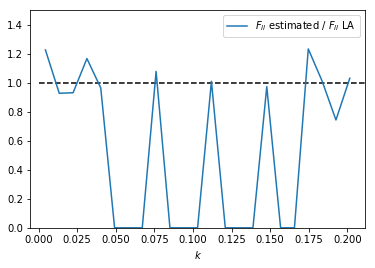

In [445]:
plot(k_bins, np.diag(fisher_est) / np.diag(fisher), label = "$F_{ll}$ estimated / $F_{ll}$ LA")
plt.axis([None, None, 0, 1.5])
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.xlabel('$k$')
plt.legend(loc=1)
plt.savefig("fisher_diagonal_ratio.png")

print np.diag(fisher_est) / np.diag(fisher)

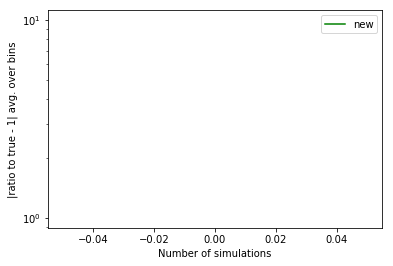

In [446]:
it = 0
f_ratio = []
while True:
    f_est_filename = 'build/fisher_est_' + str(it) + '.txt'
    if os.path.exists(f_est_filename):
        f_est_current = np.loadtxt(f_est_filename)
        f_ratio_current = np.diag(f_est_current) / np.diag(fisher)
        #f_ratio.append(np.average(np.abs(f_ratio_current - 1.)))
        f_ratio.append(np.abs(f_ratio_current[1] - 1.))
        it += 1
    else:
        break
        
f_ratio1 = f_ratio
        
plt.plot(f_ratio, 'g', label = "new")
#plt.plot(f_ratio1, 'b', label = "old")
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of simulations')
plt.ylabel('|ratio to true - 1| avg. over bins')
plt.savefig('convergence.png')

In [447]:
fisher

array([[  4.71669000e-13,   8.02491000e-14,   4.70980000e-14,
          6.34420000e-15,   4.30634000e-15,   2.87448000e-15,
          1.98285000e-15,   1.89660000e-15,   1.68561000e-15,
          1.44026000e-15,   1.66655000e-15,   1.36795000e-15,
          1.25978000e-15,   1.62358000e-15,   1.76008000e-15,
          2.38211000e-15,   1.77153000e-15,   8.93979000e-16,
          3.98204000e-16,   2.47513000e-16,   1.72535000e-16,
          5.87548000e-17,   8.72276000e-18],
       [  8.02491000e-14,   7.99782000e-13,   7.32815000e-14,
          4.00566000e-14,   7.51864000e-15,   6.38572000e-15,
          4.82892000e-15,   3.60913000e-15,   3.24095000e-15,
          3.61533000e-15,   2.75946000e-15,   2.90480000e-15,
          3.07674000e-15,   2.87523000e-15,   3.75828000e-15,
          4.76353000e-15,   3.12233000e-15,   1.30665000e-15,
          6.94252000e-16,   5.11753000e-16,   2.84863000e-16,
          1.19520000e-16,   2.58786000e-17],
       [  4.70980000e-14,   7.32815000e-14

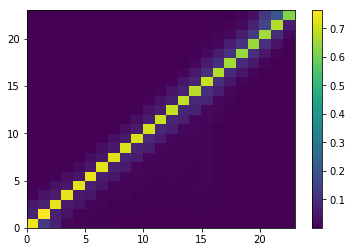

In [448]:
window = np.loadtxt('%swindow.txt' % folder)
    
pcolor(window)
colorbar()

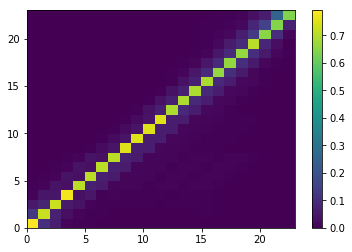

In [449]:
window_est = np.loadtxt('%swindow_est_%d.txt' % (folder, c))
#window_est1 = window_est
    
pcolor(window_est)
colorbar()

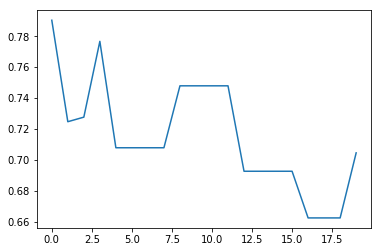

In [450]:
plot(np.diag(window_est[0:20]))

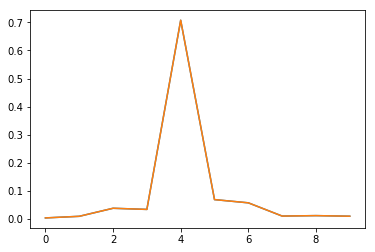

In [451]:
plot(window_est[4,:10])
plot(window_est[4,:10])

[]

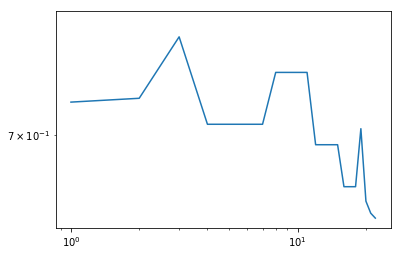

In [452]:
plot(np.diag(window_est))
plt.loglog()

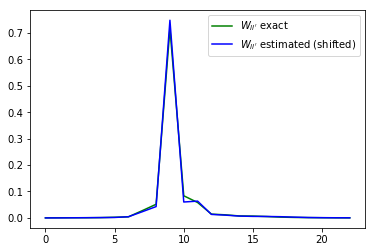

In [453]:
l1 = 9
plot(window[l1,:], 'g', label = "$W_{ll^\prime}$ exact")
plot(window_est[l1,:], 'b', label = "$W_{ll^\prime}$ estimated (shifted)")
plt.legend()
plt.savefig("window.png")

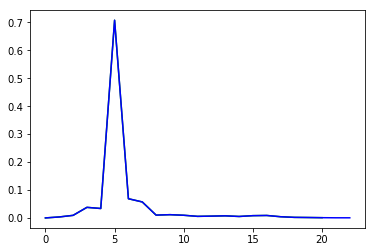

In [454]:
plot(window_est[7,2:], 'g')
plot(window_est[5,:], 'b')

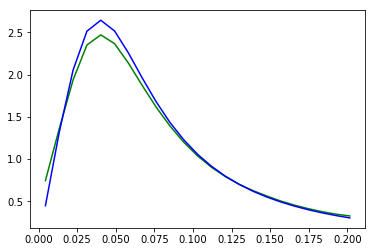

In [455]:
actual_ps_convolved = np.dot(window, actual_ps)
plt.plot(k_bins, actual_ps_convolved, 'g')
plt.plot(k_bins, actual_ps, 'b')
#plt.loglog()

[]

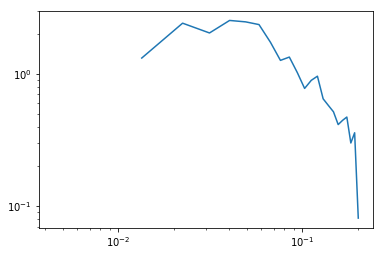

In [456]:
theta = np.loadtxt('%stheta.txt' % folder)
plt.plot(k_bins, theta)
plt.loglog()

In [457]:
L = 1380.
error = np.sqrt(np.diag(window) / np.sum(fisher, axis = 1)) / L**2
print error

[ 0.5695719   0.44776177  0.44034911  0.4519405   0.4307201   0.34789211
  0.303712    0.24866215  0.2071259   0.17180627  0.13818974  0.12005552
  0.10158772  0.08789386  0.0763263   0.06631882  0.06671714  0.07150662
  0.07798048  0.08027654  0.09069683  0.11728603  0.20596247]


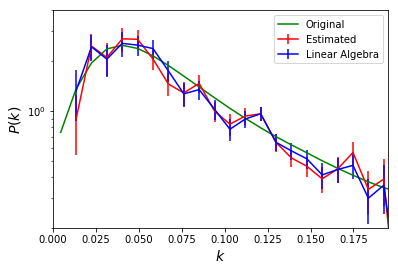

In [508]:
c = 0
theta_est = np.loadtxt('%stheta_est_%d.txt' % (folder, c))
theta_error = np.loadtxt('%stheta_error_%d.txt' %(folder, c))

plt.errorbar(k_bins, theta_est, yerr = theta_error, color = 'r', label = 'Estimated')
plt.errorbar(k_bins, theta, yerr = error, color = 'b', label = 'Linear Algebra')
plt.plot(k_bins, actual_ps_convolved, 'g', label = 'Original')
#plt.plot(k_bins, delta_ps, 'k--', label = 'Realization')
#plt.plot(k_bins, delta_min_ps, 'b--', label = 'WF')
#plt.plot(k_bins, fiducial_ps, 'g--', label = 'WF')
plt.legend(loc = 1)
plt.semilogy()
plt.xlim([0,.195])
plt.ylim([0.2,4])

plt.xlabel('$k$', fontsize = 14)
plt.ylabel('$P(k)$', fontsize = 14)
plt.savefig('pk_quad_estimator.eps')

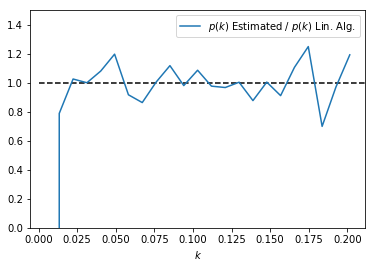

In [170]:
plt.plot(k_bins, theta_est / theta, label = '$p(k)$ Estimated / $p(k)$ Lin. Alg.')
plt.legend()
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.savefig('pk_quad_est_ratio.png')

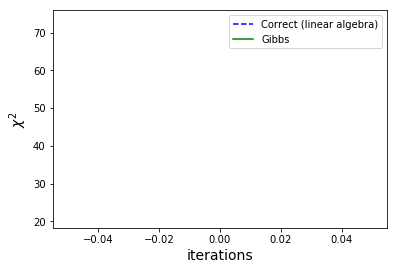

In [181]:
import os.path

it = 0
pk_chi2 = []
while True:
    theta_est_filename = folder+'theta_est_' + str(it) + '.txt'
    if os.path.exists(theta_est_filename):
        theta_est_current = np.loadtxt(theta_est_filename)
        diff = theta - actual_ps_convolved
        chi2 = np.sum(diff**2 / error**2)
        pk_chi2.append(chi2)
        it += 1
    else:
        break
        
pk_chi2_1 = np.loadtxt(folder+'pk_chi2.txt')
pk_chi2_2 = pk_chi2_1

plt.plot(pk_chi2, 'b--', label = 'Correct (linear algebra)')
plt.plot(pk_chi2_1, 'g', label = 'Gibbs')
#plt.plot(pk_chi2_2, 'r', label = 'non-Gibbs')
plt.legend()
plt.ylabel('$\chi^2$', fontsize=14)
plt.xlabel('iterations', fontsize=14)

In [182]:
plot(np.abs(pk_chi2_1[1:] - pk_chi2_1[:-1]))
plt.axis([None, None, 0, 2])

ValueError: cannot slice a 0-d array

In [183]:
diff = np.loadtxt('build/gibbs_diff.txt').reshape([N, N])
imshow(diff)
colorbar()

IOError: [Errno 2] No such file or directory: 'build/gibbs_diff.txt'

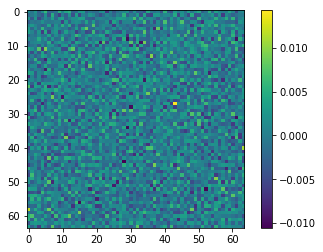

In [185]:
diff1 = np.loadtxt(folder+'gibbs_diff1.txt').reshape([N, N])
imshow(diff1)
colorbar()

In [186]:
inv_hess_test_vec = np.loadtxt(folder+'inv_hess_test_vec.txt')
inv_hess_test_vec_est = np.loadtxt(folder+'inv_hess_test_vec_est.txt')
print inv_hess_test_vec[:10]
print inv_hess_test_vec_est[:10]

[-1.79529  -0.621225  1.13161   0.53365   0.302387 -0.332718  0.15119
 -0.251237  0.539405 -0.196914]
[ -92589.5  -27174.   162028.    73418.2  100161.   -67270.    56983.2
  -99026.   213521.   -63597.1]


In [188]:
inv_hess = np.loadtxt(folder+'inv_hessian.txt')

In [ ]:
pcolor(inv_hess)
colorbar()

In [ ]:
myIter = 10
p_factor_1 = np.loadtxt(folder+'theta_factor_' + str(myIter) + '.txt')
p_factor_2 = np.loadtxt(folder+'theta_factor_' + str(60) + '.txt')
plt.plot(p_factor_2 / p_factor_1)

In [ ]:
theta_avg = np.loadtxt(folder+'theta_avg.txt')
plt.plot(k_bins, theta_avg, 'g')
plt.plot(k_bins, actual_ps_convolved, 'b')
plt.loglog()

In [ ]:
plt.plot(k_bins, theta_avg / actual_ps_convolved, label = '$p(k)$ ensemble avg. / $p(k)$ original convolved')
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.legend()
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
#print theta_avg/actual_ps_convolved
plt.savefig('pk_ens_avg_over_actual_convolved.png')

In [ ]:
delta_pk_avg = np.loadtxt('build/delta_pk_avg.txt')
plt.plot(k_bins, delta_pk_avg, 'g')
plt.plot(k_bins, actual_ps, 'b')
plt.loglog()

In [ ]:
plt.plot(k_bins, delta_pk_avg / actual_ps)
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.hlines(1.0, 0, 0.25, linestyles='dashed')

In [471]:
def fftk(shape, boxsize, symmetric=True):
    k = []
    for d in range(len(shape)):
        kd = numpy.fft.fftfreq(shape[d])
        kd *= 2 * numpy.pi / boxsize * shape[d]
        kdshape = numpy.ones(len(shape), dtype='int')
        if symmetric and d == len(shape) -1:
            kd = kd[:shape[d]//2 + 1]
        kdshape[d] = len(kd)
        kd = kd.reshape(kdshape)
        
        k.append(kd)
    kk = sum([i ** 2 for i in k])
    return kk ** 0.5

In [472]:
def power(f1, f2=None, boxsize=1.0):
    c1 = numpy.fft.rfftn(f1)
    c1 /= c1[0, 0].real
    c1[0, 0] = 0
    if f2 is not None:
        c2 = numpy.fft.rfftn(f2)
        c2 /= c2[0, 0].real
        c2[0, 0] = 0
    else:
        c2 = c1
    x = (c1 * c2.conjugate()).real
    del c1
    del c2
    k = fftk(f1.shape, boxsize)
    print k.min(), k.max()
    w = numpy.ones(k.shape, dtype='f4')
    n = f1.shape[0]
    w[:, 0] = 0.5
    w[0,0] = 1
    w[n/2, 0] = 1
    w[:, -1] = 0.5
    w[0, -1] = 1
    w[n/2, -1] = 1
    x *= w
    H, edges = numpy.histogram(k.flat, weights=x.flat, bins=int(math.ceil(float(n / 2) / np.sqrt(2)))) 
    N, edges = numpy.histogram(k.flat, weights=w.flat, bins=edges)
    center= edges[1:] + edges[:-1]
    
    return 0.5 * center, H / N / boxsize**2

In [ ]:
#folder = "build4/bin/lin_grid/"
folder = "build3/bin/lin_1/"
np.loadtxt